### **2024 Monaco Formula 1 Season: Data-Driven Insights Using FastF1**

 ***This project utilizes the FastF1 Python library to perform advanced data analysis on the 2024 Formula 1 season, uncovering insights into driver performance, race strategies, and telemetry data.***

In [5]:
import os
import fastf1
import pandas as pd

In [7]:
#cache folder
cache_folder = 'cache_folder'
if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [8]:
#get data from Monaco GP 2024
session = fastf1.get_session(2024, 'Monaco', 'R')
session.load()

print("Cache enabled from race data loaded successfully!")

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

Cache enabled from race data loaded successfully!


In [9]:
#decide what data I want
laps = session.laps
df = laps[['Driver', 'LapTime', 'Compound']]

print(df)

     Driver                LapTime Compound
0       LEC 0 days 00:40:56.330000   MEDIUM
1       LEC                    NaT     HARD
2       LEC 0 days 00:01:24.624000     HARD
3       LEC 0 days 00:01:22.625000     HARD
4       LEC 0 days 00:01:21.795000     HARD
...     ...                    ...      ...
1232    ZHO 0 days 00:01:17.173000     SOFT
1233    OCO                    NaT     HARD
1234    PER                    NaT     HARD
1235    HUL                    NaT   MEDIUM
1236    MAG                    NaT     HARD

[1237 rows x 3 columns]



#### **0. Driver Laptimes Scatterplot**

In this section, we analyze Charles Leclerc’s lap performance during the 2024 Monaco Grand Prix. Using FastF1 and Seaborn, a scatterplot is generated to display his lap times across the race, with each point representing a quick lap and color-coded by tyre compound.

By plotting lap number against lap time, we gain insights into tyre performance, consistency, and pace evolution throughout the race. To maintain clarity and focus on competitive performance, slow laps are filtered out. The y-axis is inverted to emphasize faster lap times visually.

This visualization serves as a foundation for exploring race strategies, driver consistency, and compound effectiveness over a race stint.



core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


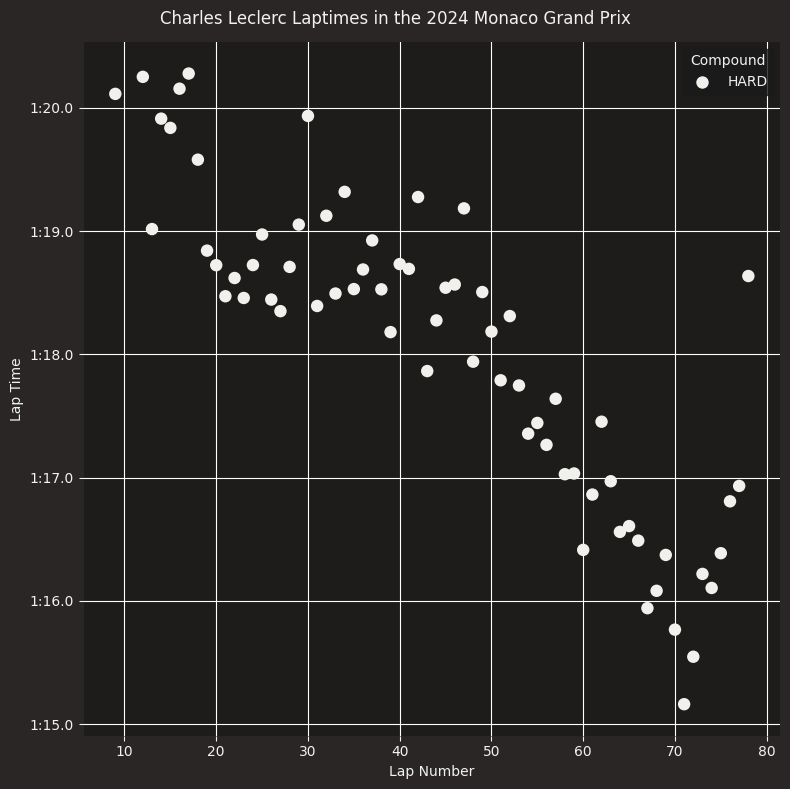

In [11]:
"""Driver Laptimes Scatterplot
==============================

Plot a driver's lap times in a race, with color coding for the compounds.
"""

import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.

race = fastf1.get_session(2024, "Monaco", 'R')
race.load()

###############################################################################
# Get all the laps for a single driver.
# Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_drivers("LEC").pick_quicklaps().reset_index()

###############################################################################
# Make the scattterplot using lap number as x-axis and lap time as y-axis.
# Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')
# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more aesthetic.
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Charles Leclerc Laptimes in the 2024 Monaco Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#### **1. Driver specific plot styling**

In this section, we explore how to enhance visual clarity and aesthetics in multi-driver performance plots using `fastf1.plotting.get_driver_style()`. The 2024 Monaco Grand Prix session is used to compare lap times of key drivers — **Hamilton**, **Pérez**, **Verstappen**, **Russell**, and **Leclerc**.

We begin by plotting each driver’s quick laps with individualized styling based on their **team colors** and **line styles**. This allows for consistent and easily distinguishable visuals across all plots. To improve readability, we apply a **sorted legend** using `add_sorted_driver_legend()` for an organized label display.

Lastly, we demonstrate how to fully customize plot styles using manually defined style dictionaries. This includes modifying **line width**, **transparency (alpha)**, and leveraging the `auto` keyword to dynamically apply team colors.

This approach to styling not only improves interpretability but also aligns the visual design with professional F1 data visualization standards.

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


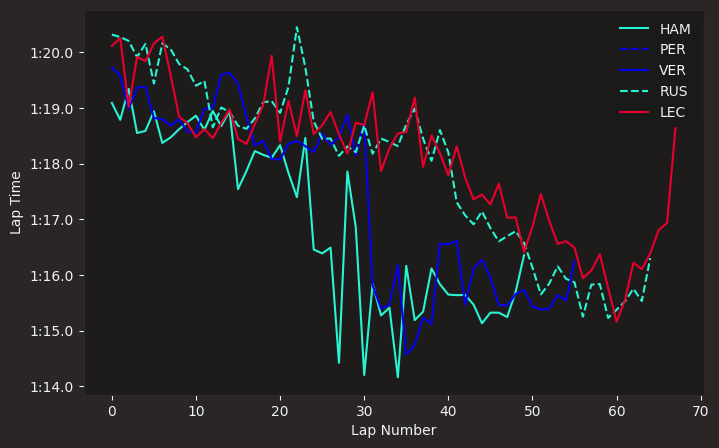

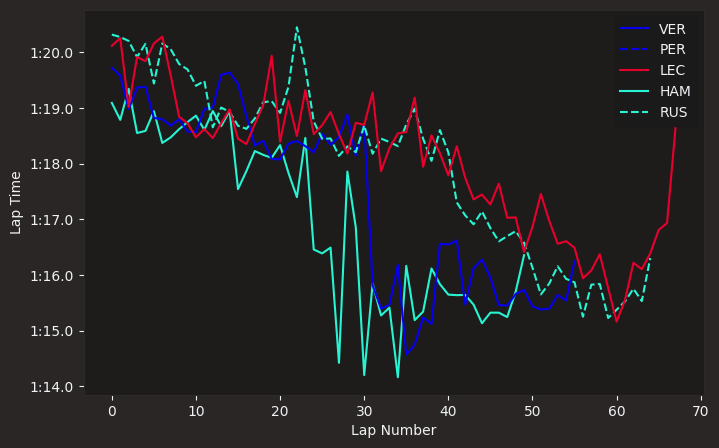

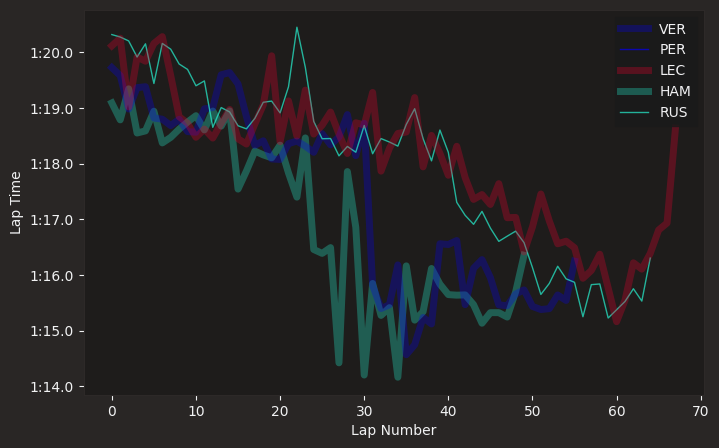

In [19]:
"""Driver specific plot styling
===============================

Create some plots and show the usage of ``fastf1.plotting.get_driver_style``.
"""

from matplotlib import pyplot as plt

import fastf1
from fastf1 import plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.

race = fastf1.get_session(2024, "Monaco", 'R')
race.load()

###############################################################################
# Basic driver-specific plot styling
# ----------------------------------
# Plot all the laps for Hamilton, Russel, Perez and Verstappen.
# Filter out slow laps as they distort the graph axis.
# Note: as LapTime is represented by timedelta, calling ``setup_mpl`` earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS', 'LEC'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()

###############################################################################
# Sorting the legend
# ------------------
# That plot looks pretty good already, but the order of the labels in the
# legend is slightly chaotic. Instead of trying to order the labels manually,
# use :func:`fastf1.plotting.add_sorted_driver_legend`.
# Let's create the exact same plot again, but this time with a sorted legend
# which means, we only change the very last function call.

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS', 'LEC'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)

###############################################################################
# Creating fully custom styles
# ----------------------------
# If you want to fully customize the plot style, you can define your own
# styling variants.
#
# Note that the value ``'auto'`` is treated as a magic keyword when used in
# combination with a color. It will be replaced with the team color.
#
# We define two styles, one for the first driver and one for the second driver
# in any team.
#
# The plot that is generated here isn't intended to be very readable, but it
# shows how you can customize any plot styling parameter.

my_styles = [
    # style for each first driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 5, 'alpha': 0.3},
    # style for each second driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 1, 'alpha': 0.7}
]

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS', 'LEC'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()

    # here, we now use ``style=my_style`` to use the custom styling
    style = plotting.get_driver_style(identifier=driver,
                                      style=my_styles,
                                      session=race)

    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)
plt.show()


#### **2. Driver Laptimes Distribution Visualization**

This section visualizes the lap time distributions of the top 10 finishers in the 2024 Monaco Grand Prix. Using a combination of **violin plots** and **swarm plots**, we analyze how consistent each driver was throughout their race stint, as well as how tyre compounds influenced performance.

To ensure meaningful comparisons, only **quick laps** are considered—excluding laps affected by yellow flags, virtual safety cars, or pit stops. The lap times are converted from timedelta to seconds for compatibility with Seaborn plotting functions.

- **Violin plots** are used to show the distribution and density of lap times per driver.
- **Swarm plots** overlay each individual lap time, color-coded by tyre compound (Soft, Medium, Hard), enabling insight into compound-specific performance across the grid.

Drivers are ordered based on their **finishing positions**, and FastF1’s built-in color mapping is used for both driver identity and compound types.

This visualization highlights differences in pace consistency, the effectiveness of different tyre strategies, and racecraft under the unique demands of the Monaco circuit.

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Monaco' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading

['16', '81', '4', '55', '44', '1', '63', '11', '23', '20']
['LEC', 'PIA', 'NOR', 'SAI', 'HAM', 'VER', 'RUS', 'PER', 'ALB', 'MAG']


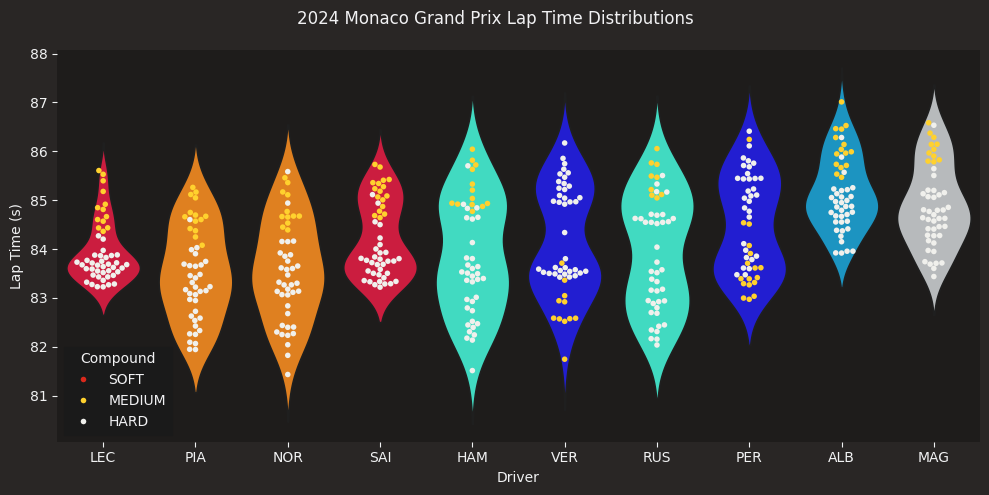

In [22]:
"""Driver Laptimes Distribution Visualization
=============================================
Visualize different drivers' laptime distributions.
"""

import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session

race = fastf1.get_session(2024, "Monaco", 'R')
race.load()

###############################################################################
# Get all the laps for the point finishers only.
# Filter out slow laps (yellow flag, VSC, pitstops etc.)
# as they distort the graph axis.
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

###############################################################################
# To plot the drivers by finishing order,
# we need to get their three-letter abbreviations in the finishing order.
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

###############################################################################
# First create the violin plots to show the distributions.
# Then use the swarm plot to show the actual laptimes.

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=race)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=race),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )
# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more aesthetic
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2024 Monaco Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#### **3. Position changes during a race**

This section visualizes **position changes** for each driver throughout the 2024 Monaco Grand Prix by plotting their position at the end of every lap.

The line chart shows how drivers moved through the field, offering a race-long perspective on overtakes, pit strategies, and consistency. Each driver is represented using their unique **abbreviation** and **team-specific color styling**, obtained through FastF1’s `get_driver_style()` function.

Key visualization elements include:
- **Lap Number (x-axis):** Shows race progression.
- **Driver Position (y-axis):** Inverted so that **P1 appears at the top** for intuitive ranking.
- A **legend placed outside** the plot ensures clarity despite the high number of overlapping lines.

This plot is especially useful for understanding race dynamics, such as:
- Who gained or lost the most positions,
- Strategic pit stop impacts,
- Recovery drives or consistency of front-runners.

Overall, this visualization gives a holistic overview of how the race unfolded for all 20 drivers, lap by lap.

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


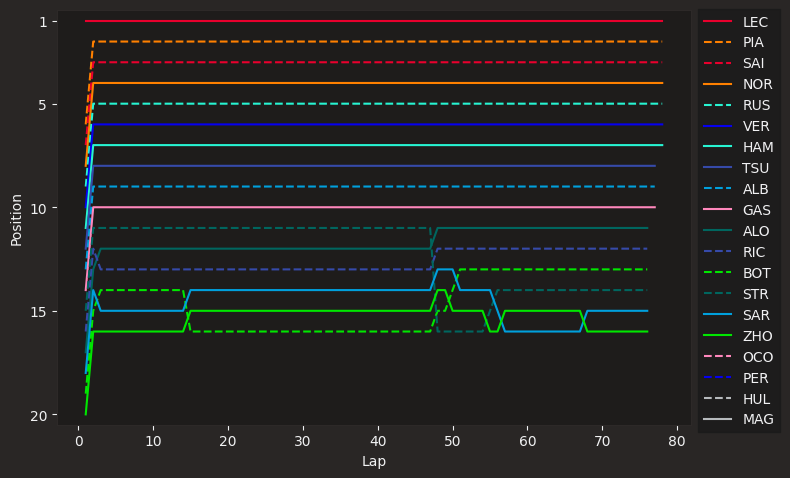

In [24]:
"""
Position changes during a race
==============================

Plot the position of each driver at the end of each lap.
"""

import matplotlib.pyplot as plt

import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')


##############################################################################
# Load the session and create the plot
session = fastf1.get_session(2024, 'Monaco', 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(8.0, 4.9))
# sphinx_gallery_defer_figures

##############################################################################
# For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
# using the value of the first lap, get their color and then plot their
# position over the number of laps.
for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)
# sphinx_gallery_defer_figures

##############################################################################
# Finalize the plot by setting y-limits that invert the y-axis so that position
# one is at the top, set custom tick positions and axis labels.
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
# sphinx_gallery_defer_figures

##############################################################################
# Because this plot is very crowed, add the legend outside the plot area.
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

#### **4. Qualifying Results Overview**

This section presents a visual overview of the qualifying session for the 2024 Monaco Grand Prix, highlighting the **fastest lap times** set by each driver.

The process begins by extracting each driver's **fastest lap**, followed by sorting all lap times to reflect the qualifying order. To improve clarity and focus on performance differences, the visualization plots the **lap time deltas** relative to the pole position lap.

Each bar in the **horizontal bar chart** represents a driver, color-coded by their respective team. The y-axis is ordered to display the **pole sitter at the top**, and grid lines help track differences in lap time deltas across the field.

This visualization provides an at-a-glance comparison of driver performance in qualifying, showcasing gaps to pole and team performance in a visually intuitive format.


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\jorda\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           

['LEC' 'PIA' 'SAI' 'NOR' 'RUS' 'VER' 'HAM' 'TSU' 'ALB' 'GAS' 'OCO' 'RIC'
 'STR' 'HUL' 'ALO' 'SAR' 'MAG' 'PER' 'BOT' 'ZHO']
   Driver                LapTime           LapTimeDelta
0     LEC 0 days 00:01:10.270000        0 days 00:00:00
1     PIA 0 days 00:01:10.424000 0 days 00:00:00.154000
2     SAI 0 days 00:01:10.518000 0 days 00:00:00.248000
3     NOR 0 days 00:01:10.542000 0 days 00:00:00.272000
4     RUS 0 days 00:01:10.543000 0 days 00:00:00.273000
5     VER 0 days 00:01:10.567000 0 days 00:00:00.297000
6     HAM 0 days 00:01:10.621000 0 days 00:00:00.351000
7     TSU 0 days 00:01:10.858000 0 days 00:00:00.588000
8     GAS 0 days 00:01:10.896000 0 days 00:00:00.626000
9     ALB 0 days 00:01:10.948000 0 days 00:00:00.678000
10    OCO 0 days 00:01:11.285000 0 days 00:00:01.015000
11    HUL 0 days 00:01:11.440000 0 days 00:00:01.170000
12    RIC 0 days 00:01:11.482000 0 days 00:00:01.212000
13    STR 0 days 00:01:11.563000 0 days 00:00:01.293000
14    MAG 0 days 00:01:11.725000 0 da

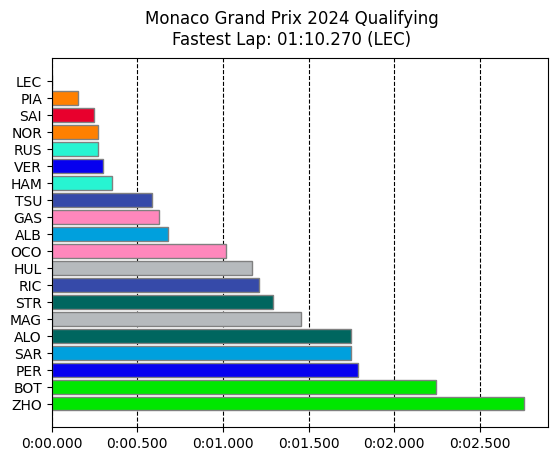

In [1]:
"""Qualifying results overview
==============================

Plot the qualifying result with visualization the fastest times.
"""


import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme=None)


session = fastf1.get_session(2024, 'Monaco', 'Q')
session.load()


##############################################################################
# First, we need to get an array of all drivers.

drivers = pd.unique(session.laps['Driver'])
print(drivers)


##############################################################################
# After that we'll get each driver's fastest lap, create a new laps object
# from these laps, sort them by lap time and have pandas reindex them to
# number them nicely by starting position.

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_drivers(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)


##############################################################################
# The plot is nicer to look at and more easily understandable if we just plot
# the time differences. Therefore, we subtract the fastest lap time from all
# other lap times.

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']


##############################################################################
# We can take a quick look at the laps we have to check if everything
# looks all right. For this, we'll just check the 'Driver', 'LapTime'
# and 'LapTimeDelta' columns.

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])


##############################################################################
# Finally, we'll create a list of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)


##############################################################################
# Now, we can plot all the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
# sphinx_gallery_defer_figures


##############################################################################
# Finally, give the plot a meaningful title

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

####  **5. Speed Visualization on Track Map**

This section visualizes Charles Leclerc’s speed profile during his fastest lap in the **2024 Monaco Grand Prix** by mapping his telemetry data directly onto the track layout.

Using FastF1’s telemetry and Matplotlib’s `LineCollection`, the lap is plotted as a continuous line where each segment is color-coded based on the car’s speed at that point. A plasma colormap is used to represent speed intensity, with a horizontal colorbar legend included for reference.

Key steps include:
- Extracting `X` and `Y` track position coordinates from telemetry data.
- Mapping `Speed` data to a color gradient.
- Creating line segments between telemetry points for dynamic coloring.
- Rendering the Monaco street circuit layout with speed variations clearly highlighted.

This type of visualization helps identify where the driver is fastest or slowing down (e.g., corners, straights) and provides a strong visual tool for performance and braking analysis during a lap.


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

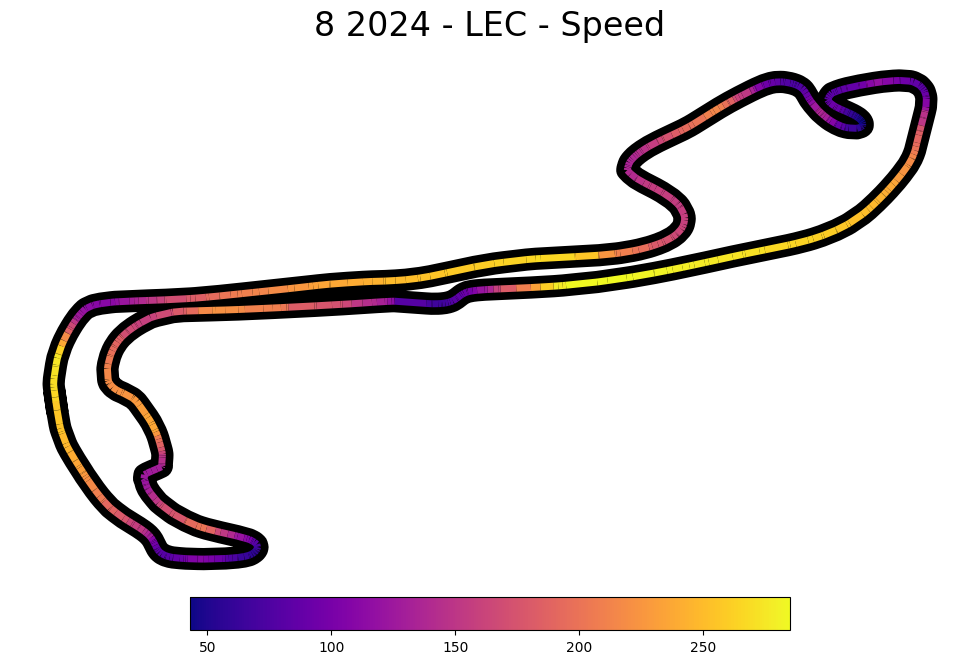

In [4]:
"""Speed visualization on track map
======================================

"""
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1


##############################################################################
# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2024
wknd = 8
ses = 'R'
driver = 'LEC'
colormap = mpl.cm.plasma


##############################################################################
# Next, we load the session and select the desired data.
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on


##############################################################################
# Now, we create a set of line segments so that we can color them
# individually. This creates the points as a N x 1 x 2 array so that we can
# stack points  together easily to get the segments. The segments array for
# line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


##############################################################################
# After this, we can actually plot the data.

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

C:\Users\jorda\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using

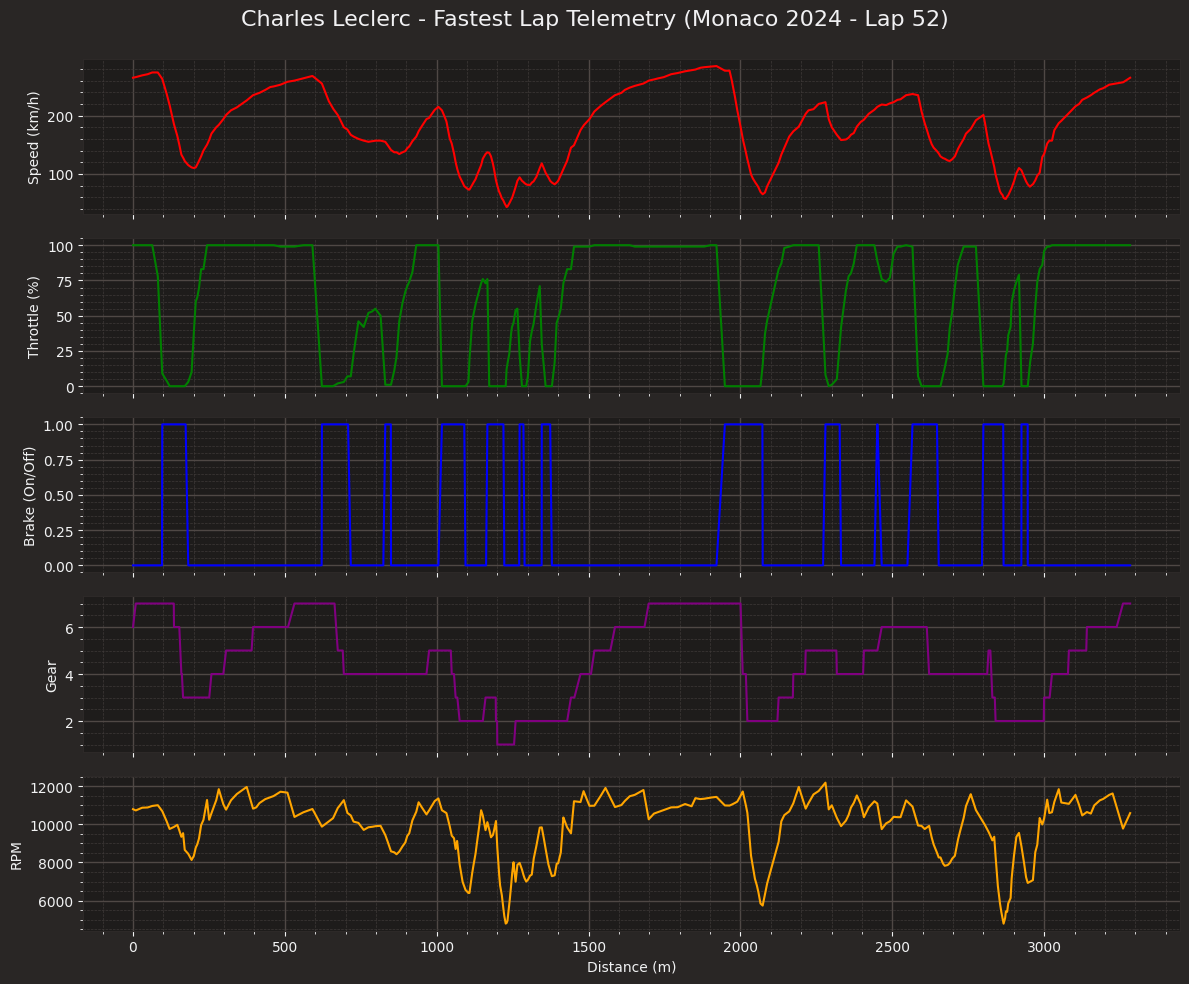

In [5]:
# Setup FastF1 with proper plotting config
plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')

# Load 2024 Monaco GP Race Session
session = fastf1.get_session(2024, 'Monaco', 'R')
session.load()

# Get Charles Leclerc's fastest lap (Lap 52)
fastest_lap = session.laps.pick_driver('LEC').pick_fastest()
telemetry = fastest_lap.get_telemetry()

# Plot multiple telemetry data series
fig, ax = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

fig.suptitle(f"Charles Leclerc - Fastest Lap Telemetry (Monaco 2024 - Lap 52)", fontsize=16)

# Speed
ax[0].plot(telemetry['Distance'], telemetry['Speed'], color='red')
ax[0].set_ylabel("Speed (km/h)")

# Throttle
ax[1].plot(telemetry['Distance'], telemetry['Throttle'], color='green')
ax[1].set_ylabel("Throttle (%)")

# Brake
ax[2].plot(telemetry['Distance'], telemetry['Brake'], color='blue')
ax[2].set_ylabel("Brake (On/Off)")

# Gear
ax[3].plot(telemetry['Distance'], telemetry['nGear'], color='purple')
ax[3].set_ylabel("Gear")

# RPM
ax[4].plot(telemetry['Distance'], telemetry['RPM'], color='orange')
ax[4].set_ylabel("RPM")
ax[4].set_xlabel("Distance (m)")

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


#### **6. Overlaying Speed Traces – Fastest Lap Comparison**

This section compares the **fastest qualifying laps** of Piastri and Leclercs during the **2024 Monaco Grand Prix** by overlaying their speed traces on a single chart.

Using FastF1 telemetry data, each driver's speed is plotted against distance traveled, offering a clear visual comparison of their performance throughout the lap. By coloring the traces with each driver's **team color**, the plot helps highlight differences in acceleration, braking points, and cornering speed.

This technique is useful for analyzing where one driver gained or lost time relative to another, revealing key performance differences in specific track sectors and helping assess driving style or car setup advantages.


core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '3', '18', '27', '14', '2', '20', '11', '77', '24']


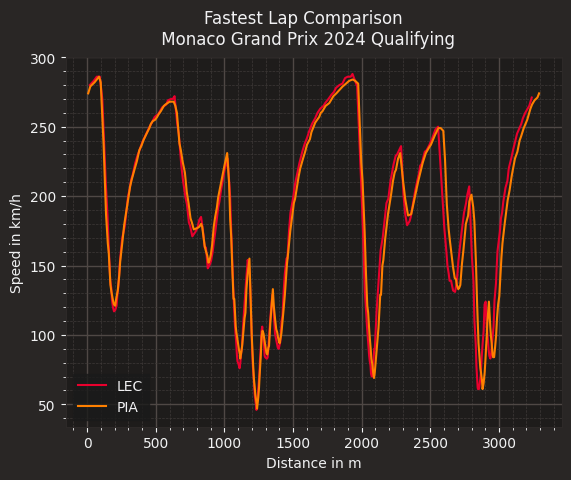

In [9]:
"""Overlaying speed traces of two laps
======================================

Compare two fastest laps by overlaying their speed traces.
"""


import matplotlib.pyplot as plt

import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# load a session and its telemetry data
session = fastf1.get_session(2024, 'Monaco', 'Q')
session.load()

##############################################################################
# First, we select the two laps that we want to compare

lec_lap = session.laps.pick_drivers('LEC').pick_fastest()
pia_lap = session.laps.pick_drivers('PIA').pick_fastest()

##############################################################################
# Next we get the telemetry data for each lap. We also add a 'Distance' column
# to the telemetry dataframe as this makes it easier to compare the laps.

lec_tel = lec_lap.get_car_data().add_distance()
pia_tel = pia_lap.get_car_data().add_distance()

##############################################################################
# Finally, we create a plot and plot both speed traces.
# We color the individual lines with the driver's team colors.

rbr_color = fastf1.plotting.get_team_color(lec_lap['Team'], session=session)
mer_color = fastf1.plotting.get_team_color(pia_lap['Team'], session=session)

fig, ax = plt.subplots()
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=rbr_color, label='LEC')
ax.plot(pia_tel['Distance'], pia_tel['Speed'], color=mer_color, label='PIA')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

#### **7. Tyre Strategies During a Race – 2024 Monaco Grand Prix**

This section visualizes the **tyre strategies** of all drivers during the 2024 Monaco Grand Prix by representing each stint on a horizontal bar chart. The strategy visualization shows which compounds each driver used and for how many laps, offering an at-a-glance summary of race tactics.

The process includes:
- Grouping lap data by driver, stint number, and tyre compound  
- Calculating **stint length** by counting laps per compound  
- Mapping each stint as a horizontal bar using the compound’s official color  
- Aligning all bars by driver and sequencing them from start to finish

The y-axis is inverted so that the **highest-finishing drivers appear at the top**, making the chart more intuitive for race analysis. This plot is particularly useful for evaluating:
- One-stop vs. two-stop strategies  
- Compound selection timing  
- Tyre degradation patterns over a race

It provides a clear picture of how tyre decisions shaped the outcome of the Grand Prix.


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
['LEC', 'PIA', 'SAI', 'NOR', 'RUS', 'VER', 'HAM', 'TSU', 'ALB', 'GAS', 'ALO', 'RIC', 'BOT', 'STR', 'SAR', 'ZHO', 'OCO', 'PER', 'HUL', 'MAG']
   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM            1
1     ALB    2.0     HARD           76
2     ALO    1.0     HARD            1
3     ALO    2.0   MEDIUM           75
4     BOT    1.0     HARD            1
5     BOT    2.0   MEDIUM           14
6     BOT    3.0     HARD           61
7     GAS    1.0     HARD            1
8     GAS    2.0   MEDIUM           76
9     HAM    1.0     HARD            1
10    HAM    2.0   MEDIUM           50
11    HAM    3.0     HARD           27
12    HUL    1.0   MEDIUM            1
13    LEC    1.0   MEDIUM            1
14    LEC    2.0     HARD           77
15    MAG    1.0     HARD            1
16    NOR    1.0   MEDIUM            1
17    NOR    2.0     HARD           77
1

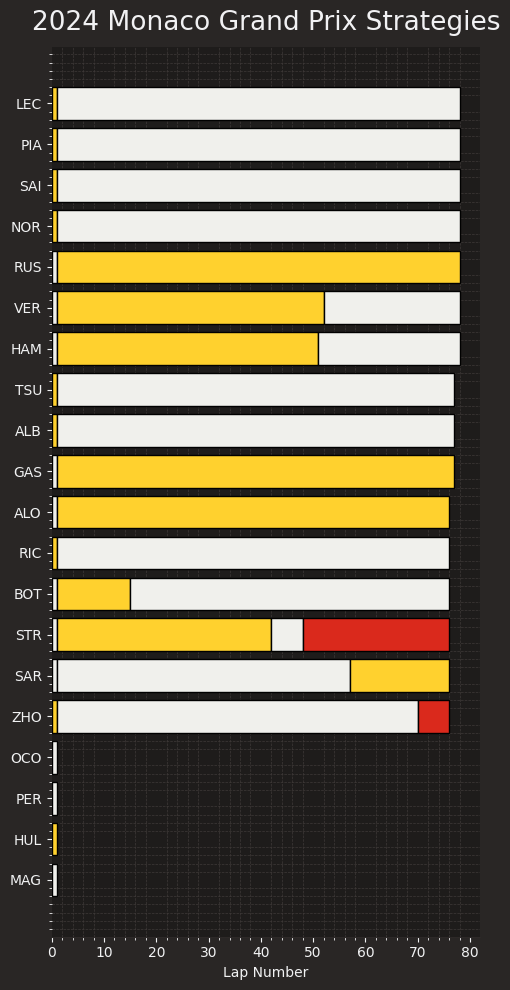

In [10]:
"""
Tyre strategies during a race
=============================

Plot all drivers' tyre strategies during a race.
"""

from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


###############################################################################
# Load the race session

session = fastf1.get_session(2024, "Monaco", 'R')
session.load()
laps = session.laps

###############################################################################
# Get the list of driver numbers
drivers = session.drivers
print(drivers)

###############################################################################
# Convert the driver numbers to three letter abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

###############################################################################
# We need to find the stint length and compound used
# for every stint by every driver.
# We do this by first grouping the laps by the driver,
# the stint number, and the compound.
# And then counting the number of laps in each group.
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

###############################################################################
# The number in the LapNumber column now stands for the number of observations
# in that group aka the stint length.
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

###############################################################################
# Now we can plot the strategies for each driver
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more readable and intuitive
plt.title("2024 Monaco Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

# sphinx_gallery_defer_figures

###############################################################################
# Plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

#### **8. Team Pace Comparison**

This section analyzes and ranks each Formula 1 team's **race pace** during the **2024 Monaco Grand Prix**, based on the distribution of their drivers' quick laps. By filtering out slow laps and outliers, we focus on **clean race pace** to compare team performance under normal conditions.

Each team's lap times are visualized using a **Seaborn boxplot**, which shows the **median**, **interquartile range**, and any potential variance in pace. Teams are ordered from fastest (lowest median lap time) to slowest, and are color-coded according to their official team colors for visual clarity.

Key steps:
- Select only **quick laps** (within 107% of the fastest lap) to ensure consistency
- Convert lap times into seconds for compatibility with Seaborn
- Group and rank teams by **median lap time**
- Display performance distributions in a side-by-side boxplot

This visualization highlights the **relative performance** of each constructor in race conditions, revealing which teams had the strongest pace and which lagged behind, regardless of finishing position.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Monaco' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req       

Index(['McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing', 'Aston Martin',
       'Williams', 'Haas F1 Team', 'RB', 'Alpine', 'Kick Sauber'],
      dtype='object', name='Team')


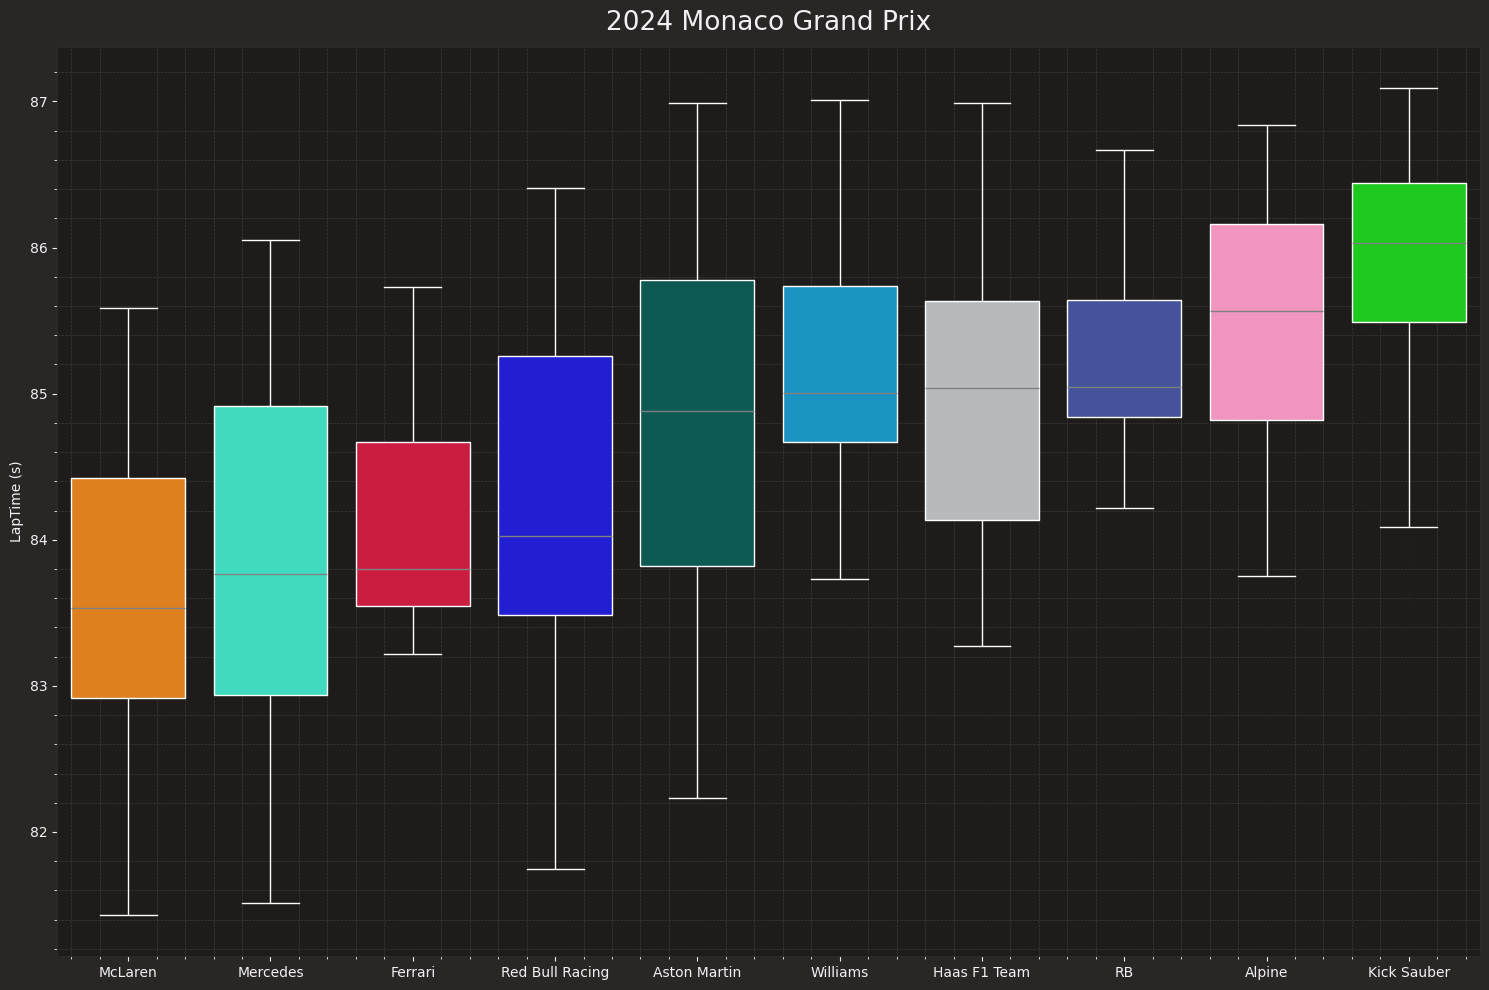

In [11]:
"""Team Pace Comparison
=============================================
Rank team's race pace from the fastest to the slowest.
"""

import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.
# Pick all quick laps (within 107% of fastest lap).
# For races with mixed conditions, pick_wo_box() is better.
race = fastf1.get_session(2024, 'Monaco', 'R')
race.load()
laps = race.laps.pick_quicklaps()

###############################################################################
# Convert the lap time column from timedelta to integer.
# This is a seaborn-specific modification.
# If plotting with matplotlib, set mpl_timedelta_support to true
# with plotting.setup_mpl.
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

###############################################################################
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2024 Monaco Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [14]:
# flake8: noqa
"""Who can still win the drivers WDC?
======================================

Calculates which drivers still has chance to win the WDC.
Simplified since it doesn't compare positions if points are equal.

This example implements 3 functions that it then uses to calculate
its result.
"""

import fastf1
from fastf1.ergast import Ergast


##############################################################################
# For this example, we are looking at the 2023 season.
# We want to know who can theoretically still win the drivers' championship
# after the first 15 races.

SEASON = 2024
ROUND = 15


##############################################################################
# Get the current driver standings from Ergast.
# Reference https://docs.fastf1.dev/ergast.html#fastf1.ergast.Ergast.get_driver_standings
def get_drivers_standings():
    ergast = Ergast()
    standings = ergast.get_driver_standings(season=SEASON, round=ROUND)
    return standings.content[0]


##############################################################################
# We need a function to calculates the maximum amount of points possible if a
# driver wins everything left of the season.
# https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems
def calculate_max_points_for_remaining_season():
    POINTS_FOR_SPRINT = 8 + 25 + 1  # Winning the sprint, race and fastest lap
    POINTS_FOR_CONVENTIONAL = 25 + 1  # Winning the race and fastest lap

    events = fastf1.events.get_event_schedule(SEASON, backend='ergast')
    events = events[events['RoundNumber'] > ROUND]
    # Count how many sprints and conventional races are left
    sprint_events = len(events.loc[events["EventFormat"] == "sprint_shootout"])
    conventional_events = len(events.loc[events["EventFormat"] == "conventional"])

    # Calculate points for each
    sprint_points = sprint_events * POINTS_FOR_SPRINT
    conventional_points = conventional_events * POINTS_FOR_CONVENTIONAL

    return sprint_points + conventional_points


##############################################################################
# For each driver we will see if there is a chance to get more points than
# the current leader. We assume the leader gets no more points and the
# driver gets the theoretical maximum amount of points.
#
# We currently don't consider the case of two drivers getting equal points
# since its more complicated and would require comparing positions.
def calculate_who_can_win(driver_standings, max_points):
    LEADER_POINTS = int(driver_standings.loc[0]['points'])

    for i, _ in enumerate(driver_standings.iterrows()):
        driver = driver_standings.loc[i]
        driver_max_points = int(driver["points"]) + max_points
        can_win = 'No' if driver_max_points < LEADER_POINTS else 'Yes'

        print(f"{driver['position']}: {driver['givenName'] + ' ' + driver['familyName']}, "
              f"Current points: {driver['points']}, "
              f"Theoretical max points: {driver_max_points}, "
              f"Can win: {can_win}")


##############################################################################
# Now using the 3 functions above we can use them to calculate who
# can still win.

# Get the current drivers standings
driver_standings = get_drivers_standings()

# Get the maximum amount of points
points = calculate_max_points_for_remaining_season()

# Print which drivers can still win
calculate_who_can_win(driver_standings, points)

1: Max Verstappen, Current points: 295.0, Theoretical max points: 451, Can win: Yes
2: Lando Norris, Current points: 225.0, Theoretical max points: 381, Can win: Yes
3: Charles Leclerc, Current points: 192.0, Theoretical max points: 348, Can win: Yes
4: Oscar Piastri, Current points: 179.0, Theoretical max points: 335, Can win: Yes
5: Carlos Sainz, Current points: 172.0, Theoretical max points: 328, Can win: Yes
6: Lewis Hamilton, Current points: 154.0, Theoretical max points: 310, Can win: Yes
7: Sergio Pérez, Current points: 139.0, Theoretical max points: 295, Can win: Yes
8: George Russell, Current points: 122.0, Theoretical max points: 278, Can win: No
9: Fernando Alonso, Current points: 50.0, Theoretical max points: 206, Can win: No
10: Lance Stroll, Current points: 24.0, Theoretical max points: 180, Can win: No
11: Nico Hülkenberg, Current points: 22.0, Theoretical max points: 178, Can win: No
12: Yuki Tsunoda, Current points: 22.0, Theoretical max points: 178, Can win: No
13: Da

#### **Conclusion**  

This project presents an in-depth analysis of the 2024 Formula 1 Monaco Grand Prix using the FastF1 Python library. By leveraging telemetry data, session results, and race information, I explored key aspects of driver performance, strategy execution, and team competitiveness. The project showcases how data science and sports analytics intersect to deliver meaningful insights in a high-performance motorsport context.

---

#### **Learning Outcomes and Technical Skills**

- **Python for F1 Data Analysis** 
    - Gained proficiency with the FastF1 library to load, cache, and explore session data from all race segments (Practice, Qualifying, Race).  
    - Worked with structured session data, including laps, stints, telemetry, compound usage, and driver positions.

- **Data Transformation and Feature Engineering**
    - Converted and processed raw race data (e.g., `timedelta` to seconds) for visualization and analysis.  
    - Engineered features such as stint lengths, fastest laps, lap time deltas, and driver telemetry profiles.  
    - Filtered out unrepresentative data (e.g., slow laps, VSC laps) to ensure reliable analysis.

- **Data Visualization with Matplotlib and Seaborn**
    - Built customized plots to visualize:
      - Lap time progression and distributions  
      - Tyre compound usage and strategies  
      - Speed traces over distance  
      - Driver position changes throughout the race  
    - Used `LineCollection` to map telemetry speed data directly onto the circuit layout.

- **Applied Machine Learning for Predictive Insight**
    - Used `sklearn` to train a Gradient Boosting Regressor that predicted potential lap times based on qualifying data.  
    - Gained experience with model training, validation, and evaluation using MAE.

- **Exploratory Race Insights**  
    - Explored the effect of tyre compounds and stint length on race performance.  
    - Compared driver performance using telemetry overlays to identify differences in throttle, brake, gear usage, and speed.  
    - Ranked teams based on race pace by analyzing median lap times from filtered quick laps.  
    - Evaluated qualifying performance by computing lap time deltas to pole and visualizing gaps across the grid.

---

#### **Highlights of the Analysis**

- Visualized Charles Leclerc’s speed profile using telemetry heatmaps on the Monaco track layout.
- Compared the fastest qualifying laps of Leclerc and Piastri, identifying key differences in speed and sector timing.
- Created lap time distribution plots for the top 10 finishers to examine consistency and tyre effectiveness.
- Visualized team-level race pace to identify constructors with the strongest overall performance.
- Analyzed each driver’s tyre strategy through stint-based compound timelines.
- Assessed the 2024 WDC title fight by computing the theoretical maximum points each driver can still achieve.

---

### **Final Reflection**

Through this project, I developed a comprehensive understanding of how to work with real-world motorsport data using Python. I strengthened my skills in:

- Data collection and preprocessing  
- Telemetry interpretation  
- Visual analytics  
- Machine learning application in sports  
- Domain-specific storytelling  

This analysis demonstrates the power of combining domain knowledge with technical tools to generate insights that are both accurate and visually compelling. The workflow established here can be extended to future races, alternative drivers, or even live dashboards for real-time race monitoring.

This project lays the groundwork for deeper explorations into performance modeling, strategic simulations, and predictive analytics within the realm of Formula 1.
